# Linear SVM

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn import datasets

# Dataset
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

# Usage Example:
# SVM classifiers do not output a probability like logistic regression
svm_clf.predict([[2.4, 3.1]])

array([1])

In [9]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    x0 = np.linspace(xmin, xmax, 200)

    ######################################
    ## WRITE YOUR CODE HERE (10 Points) ##
    ######################################

    # Hint: at the decision boundary, w0*x0 + w1*x1 + b = 0,
    # write down the formula of x1 as decision_boundary here

    decision_boundary = -(w[0] * x0 + b) / w[1] #
    margin = 1 / np.linalg.norm(w) #

    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

(np.float64(-2.0), np.float64(2.0), np.float64(-2.0), np.float64(2.0))

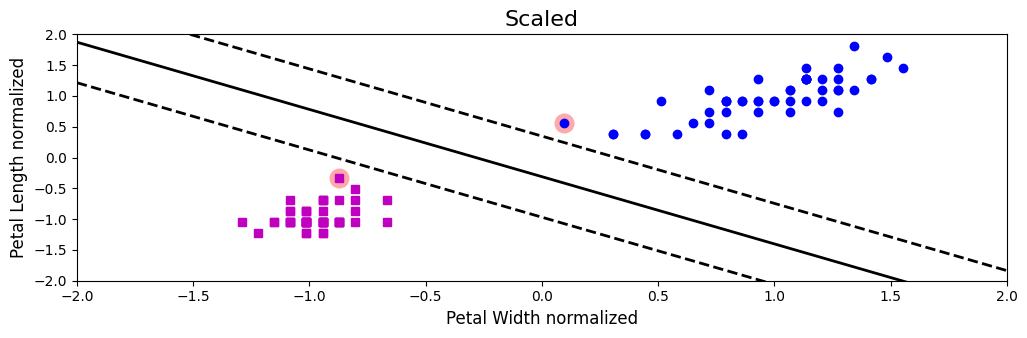

In [10]:
#Plot the decision boundaries
import numpy as np
from sklearn.preprocessing import StandardScaler

plt.figure(figsize=(12,3.2))
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
svm_clf.fit(X_scaled, y)

plt.plot(X_scaled[:, 0][y==1], X_scaled[:, 1][y==1], "bo")
plt.plot(X_scaled[:, 0][y==0], X_scaled[:, 1][y==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)

plt.xlabel("Petal Width normalized", fontsize=12)
plt.ylabel("Petal Length normalized", fontsize=12)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

# Non Linear SVM

In [11]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC

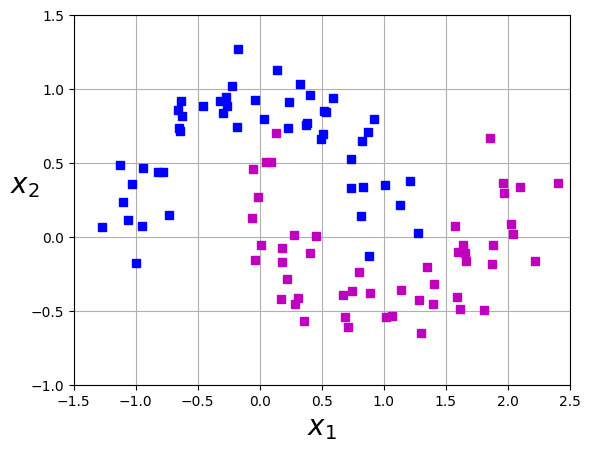

In [12]:
# Construct some test data
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

# Define a function to plot the dataset
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "ms")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

# Let's have a look at the data we have generated
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [13]:
# Define a function plot the decision boundaries

def plot_predictions(clf, axes):
    # create data in continous linear space
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

In [16]:
# Build the model and set hyperparameters
# Create a pipeline to create features, scale data and fit the model

######################################
## WRITE YOUR CODE HERE (15 Points) ## 
######################################

polynomial_svm_clf = Pipeline([("poly_features", PolynomialFeatures(degree=3)), ("scaler", StandardScaler()), ("svm_clf", LinearSVC(C=1, loss="hinge"))]) # finish the pipeline

# Hint:
# Pipeline allows you to chain multiple preprocessing and modeling steps together.
# Step1：begin by applying polynomial feature transformation to the input data, using a degree of 3 to capture non-linear relationships.
# Step2: scale the data with a standard scaler to ensure that the features are standardized
# Step3: use a linear SVM classifier with hinge loss and appropriate hyperparameter.

# Once the pipeline is constructed, you can fit the model on the training data
polynomial_svm_clf.fit(X,y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=1, loss='hinge'))])

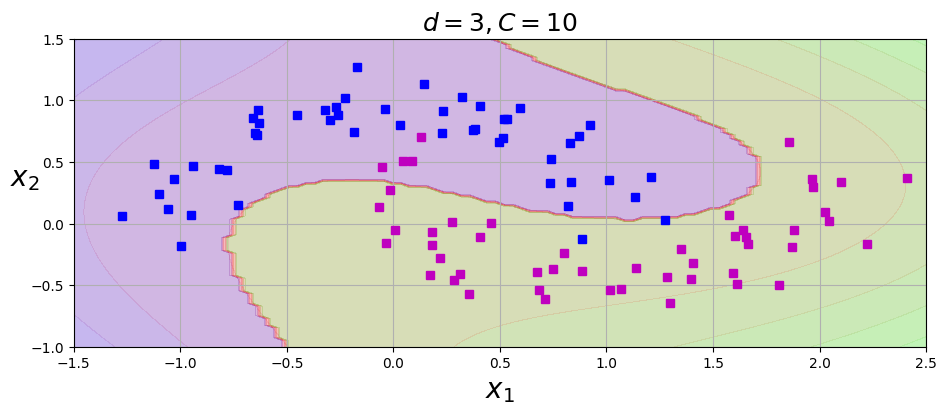

In [17]:
#plot the decision boundaries
plt.figure(figsize=(11, 4))

#plot the decision boundaries
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])

#plot the dataset
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.title(r"$d=3, C=10$", fontsize=18)
plt.show()